In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## By State 

### Overall Food Insecurity



In [2]:
fis="https://raw.githubusercontent.com/sleepysloth12/data608_story6/main/food_insecurity_by_state.csv"
cs20="https://raw.githubusercontent.com/sleepysloth12/data608_story6/main/2020_census.csv"

fi_state_raw = pd.read_csv(fis)
census_data = pd.read_csv('2020_census.csv')
census_data['state'] = census_data['state'].str.title()
fi_state_raw = fi_state_raw.merge(census_data, left_on='state_name', right_on='state', how='left')
fi_state_raw.drop(columns=['state'], inplace=True)

#print(fi_state_raw.columns)



fi_state_raw['n_food_insecure_persons'] = pd.to_numeric(
    fi_state_raw['n_food_insecure_persons'].str.replace(',', ''),
    errors='coerce'
)

fi_state_raw['n_children_FI'] = pd.to_numeric(
    fi_state_raw['n_children_FI'].str.replace(',', ''),
    errors='coerce'
)


fi_state_raw['food_insecurity_rate'] = pd.to_numeric(
    fi_state_raw['food_insecurity_rate'].str.replace('%', ''),
    errors='coerce'
) / 100

fi_state_raw['child_FI_rate'] = pd.to_numeric(
    fi_state_raw['child_FI_rate'].str.replace('%', ''),
    errors='coerce'
) / 100

#print(fi_state_raw.columns)


#print(fi_state_raw.dtypes)

fi_general = fi_state_raw[['state_code', 'state_name', 'n_food_insecure_persons', 'food_insecurity_rate', 'pop']]


fi_children = fi_state_raw[['state_code', 'state_name', 'n_children_FI', 'child_FI_rate','pop']]

shapefile_path = r'C:\Users\bleac\OneDrive\Documents\Masters\Data608\story6\shape_files\cb_2018_us_state_500k.shp'


us_states = gpd.read_file(shapefile_path)


#print(us_states.columns)


In [3]:
fi_general['n_food_insecure_persons'] = pd.to_numeric(
    fi_general['n_food_insecure_persons'].replace({',': ''}, regex=True),
    errors='coerce'
)


non_numeric = fi_general[~fi_general['n_food_insecure_persons'].apply(lambda x: isinstance(x, (int, float)))]
print(f"Non-numeric entries found in 'n_food_insecure_persons':\n{non_numeric}")


fi_general_avg = fi_general.groupby('state_code')['food_insecurity_rate'].mean().reset_index()


map_data = us_states.merge(fi_general_avg, left_on='STUSPS', right_on='state_code', how='left')

print(map_data.dtypes)


Non-numeric entries found in 'n_food_insecure_persons':
Empty DataFrame
Columns: [state_code, state_name, n_food_insecure_persons, food_insecurity_rate, pop]
Index: []
STATEFP                   object
STATENS                   object
AFFGEOID                  object
GEOID                     object
STUSPS                    object
NAME                      object
LSAD                      object
ALAND                      int64
AWATER                     int64
geometry                geometry
state_code                object
food_insecurity_rate     float64
dtype: object


C:\Users\bleac\AppData\Local\Temp\ipykernel_18104\1780274198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fi_general['n_food_insecure_persons'] = pd.to_numeric(


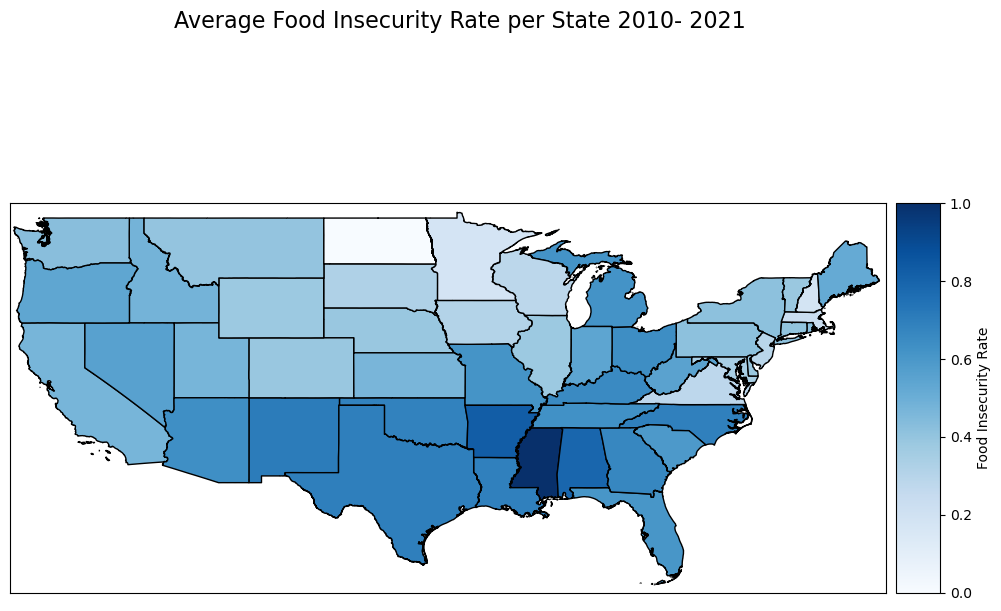

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plot = map_data.plot(column='food_insecurity_rate', ax=ax, edgecolor='black', legend=False, cmap='Blues')


ax.set_aspect('equal')
ax.set_xlim(-125, -66.5)
ax.set_ylim(24, 50)


ax.set_xticks([])
ax.set_yticks([])


sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))

sm._A = []

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Food Insecurity Rate')


plt.suptitle('Average Food Insecurity Rate per State 2010- 2021', fontsize=16)

plt.show()

### Child Food Insecurity

C:\Users\bleac\AppData\Local\Temp\ipykernel_18104\890555559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fi_children['n_children_FI'] = pd.to_numeric(


Non-numeric entries found in 'n_children_FI':
Empty DataFrame
Columns: [state_code, state_name, n_children_FI, child_FI_rate, pop]
Index: []


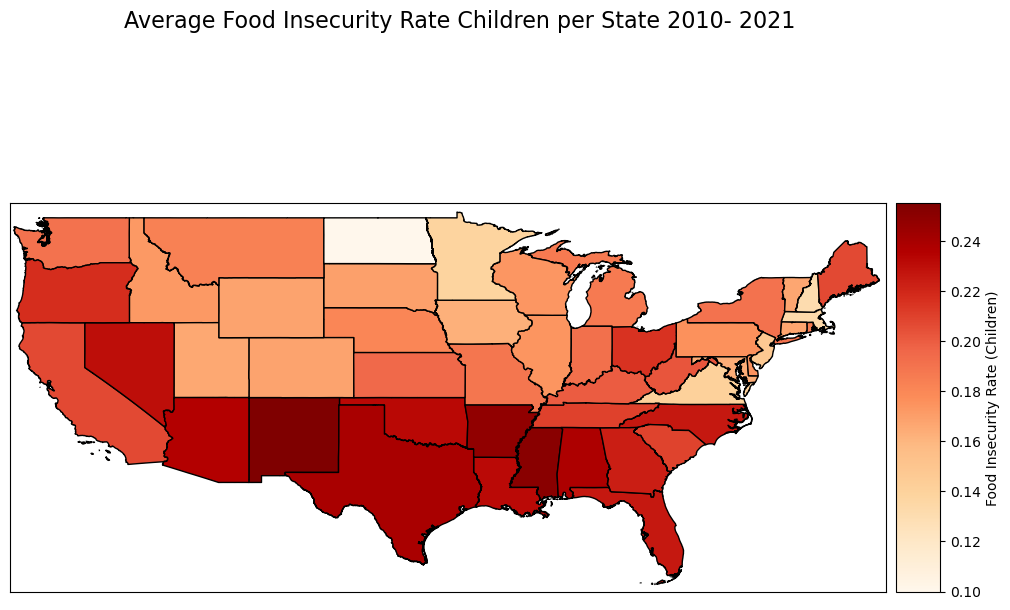

In [5]:
#print(fi_children.dtypes)
fi_children['n_children_FI'] = pd.to_numeric(
    fi_children['n_children_FI'].replace({',': ''}, regex=True),
    errors='coerce'
)


non_numeric_children = fi_children[~fi_children['n_children_FI'].apply(lambda x: isinstance(x, (int, float)))]
print(f"Non-numeric entries found in 'n_children_FI':\n{non_numeric_children}")


fi_children_avg = fi_children.groupby('state_code')['child_FI_rate'].mean().reset_index()


map_data_children = us_states.merge(fi_children_avg, left_on='STUSPS', right_on='state_code', how='left')


fig, ax_children = plt.subplots(1, 1, figsize=(12, 8))

map_data_children.plot(column='child_FI_rate', ax=ax_children, edgecolor='black', legend=False, cmap='OrRd')


ax_children.set_aspect('equal')
ax_children.set_xlim(-125, -66.5)
ax_children.set_ylim(24, 50)


ax_children.set_xticks([])
ax_children.set_yticks([])


sm_children = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=map_data_children['child_FI_rate'].min(), vmax=map_data_children['child_FI_rate'].max()))
sm_children._A = []
divider = make_axes_locatable(ax_children)
cax_children = divider.append_axes("right", size="5%", pad=0.1)
cbar_children = fig.colorbar(sm_children, cax=cax_children)
cbar_children.set_label('Food Insecurity Rate (Children)')


plt.suptitle('Average Food Insecurity Rate Children per State 2010- 2021', fontsize=16)

plt.show()

## Over Time

### Adult vs Children

#### Food Insecurity Rate

Index(['state_name', 'state_code', 'food_insecurity_rate',
       'n_food_insecure_persons', 'child_FI_rate', 'n_children_FI', 'year'],
      dtype='object')
state_name                  object
state_code                  object
food_insecurity_rate       float64
n_food_insecure_persons      int64
child_FI_rate              float64
n_children_FI                int64
year                         int64
dtype: object


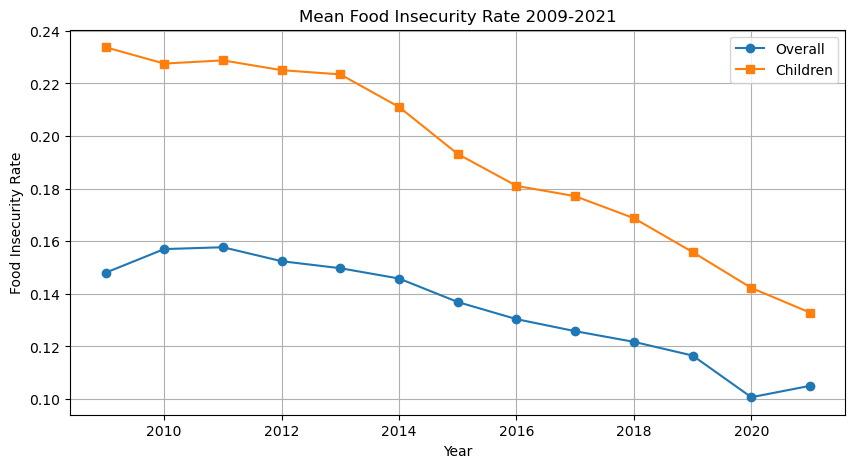

In [6]:
yearly_data_general = fi_state_raw.groupby('year')['food_insecurity_rate'].mean().reset_index()
yearly_data_children = fi_state_raw.groupby('year')['child_FI_rate'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(yearly_data_general['year'], yearly_data_general['food_insecurity_rate'], '-o', label='Overall')
plt.plot(yearly_data_children['year'], yearly_data_children['child_FI_rate'], '-s', label='Children')


plt.title('Mean Food Insecurity Rate 2009-2021')
plt.xlabel('Year')
plt.ylabel('Food Insecurity Rate')
plt.grid(True)

plt.legend()


plt.show()

#### Proportion of Children over Adults

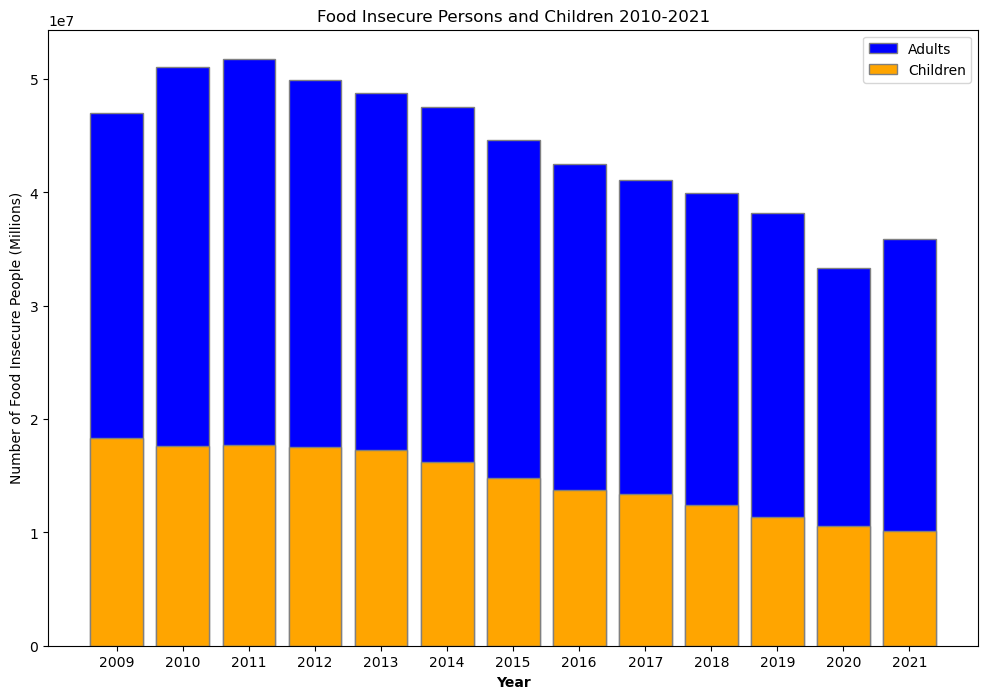

In [7]:
yearly_sum = fi_state_raw.groupby('year').agg({
    'n_food_insecure_persons': 'sum',
    'n_children_FI': 'sum'
}).reset_index()


plt.figure(figsize=(12, 8))


plt.bar(yearly_sum['year'], yearly_sum['n_food_insecure_persons'], color='blue', edgecolor='grey', label='Adults')


plt.bar(yearly_sum['year'], yearly_sum['n_children_FI'], color='orange', edgecolor='grey', label='Children')


plt.xlabel('Year', fontweight='bold')
plt.xticks(yearly_sum['year'])


plt.legend()


plt.ylabel('Number of Food Insecure People (Millions)')
plt.title('Food Insecure Persons and Children 2010-2021')


plt.show()

## Threshold



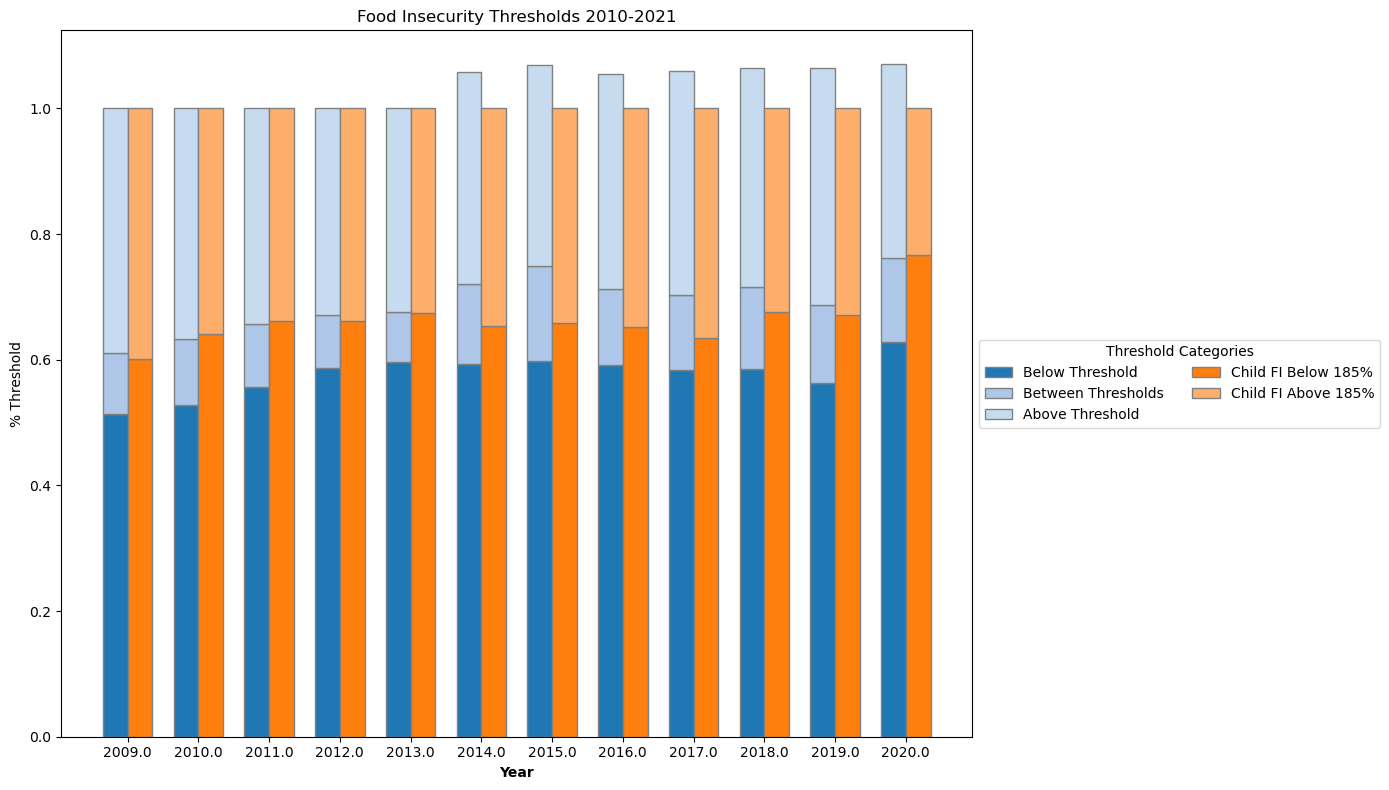

In [8]:
fi_thresh_data = pd.read_csv('fi_thresh_data.csv')

fi_thresh_data = fi_thresh_data[fi_thresh_data['year'] <= 2020]


yearly_data = fi_thresh_data.groupby('year').agg({
    'FI_below_thresh': 'mean',
    'FI_btwn_thresh': 'mean',
    'FI_above_thresh': 'mean',
    'child_FI_blw_185': 'mean',
    'child_FI_abv_185': 'mean'
}).reset_index()


fig, ax = plt.subplots(figsize=(14, 8))  


bar_width = 0.35


r1 = np.arange(len(yearly_data['year']))
r2 = [x + bar_width for x in r1]


colors_general = ['#1f77b4', '#aec7e8', '#c6dbef']
colors_children = ['#ff7f0e', '#fdae6b', '#fdd0a2']


ax.bar(r1, yearly_data['FI_below_thresh'], color=colors_general[0], width=bar_width, edgecolor='grey', label='Below Threshold')
ax.bar(r1, yearly_data['FI_btwn_thresh'], bottom=yearly_data['FI_below_thresh'], color=colors_general[1], width=bar_width, edgecolor='grey', label='Between Thresholds')
ax.bar(r1, yearly_data['FI_above_thresh'], bottom=yearly_data['FI_below_thresh'] + yearly_data['FI_btwn_thresh'], color=colors_general[2], width=bar_width, edgecolor='grey', label='Above Threshold')


ax.bar(r2, yearly_data['child_FI_blw_185'], color=colors_children[0], width=bar_width, edgecolor='grey', label='Child FI Below 185%')
ax.bar(r2, yearly_data['child_FI_abv_185'], bottom=yearly_data['child_FI_blw_185'], color=colors_children[1], width=bar_width, edgecolor='grey', label='Child FI Above 185%')


plt.xlabel('Year', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(r1))], yearly_data['year'])


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, title="Threshold Categories")


plt.ylabel('% Threshold')
plt.title('Food Insecurity Thresholds 2010-2021')

plt.tight_layout()  


plt.show()

## Cost / Meal



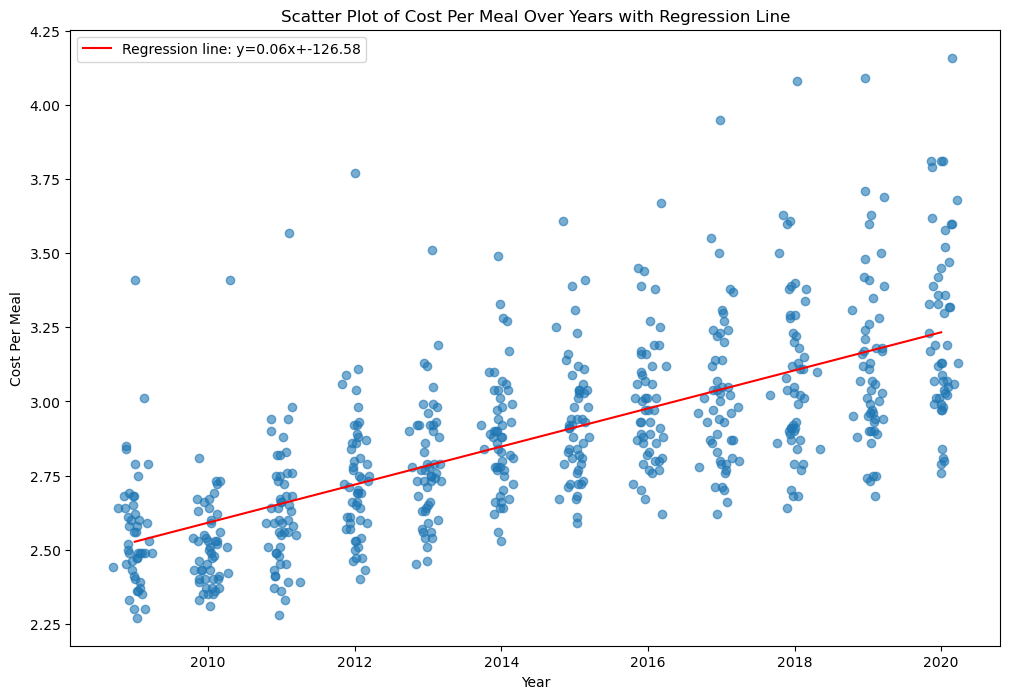

In [9]:
fi_thresh_data = fi_thresh_data.dropna(subset=['cost_per_meal'])


x_jittered = fi_thresh_data['year'] + np.random.normal(0, 0.1, size=len(fi_thresh_data))
y = fi_thresh_data['cost_per_meal']

plt.figure(figsize=(12, 8))
plt.scatter(x_jittered, y, alpha=0.6) 


slope, intercept, r_value, p_value, std_err = stats.linregress(fi_thresh_data['year'], y)
line = slope * fi_thresh_data['year'].unique() + intercept


sorted_years = np.sort(fi_thresh_data['year'].unique())


plt.plot(sorted_years, slope * sorted_years + intercept, color='red', label=f'Regression line: y={slope:.2f}x+{intercept:.2f}')


plt.xlabel('Year')
plt.ylabel('Cost Per Meal')
plt.title('Scatter Plot of Cost Per Meal Over Years with Regression Line')


plt.legend()


plt.show()

## By Race

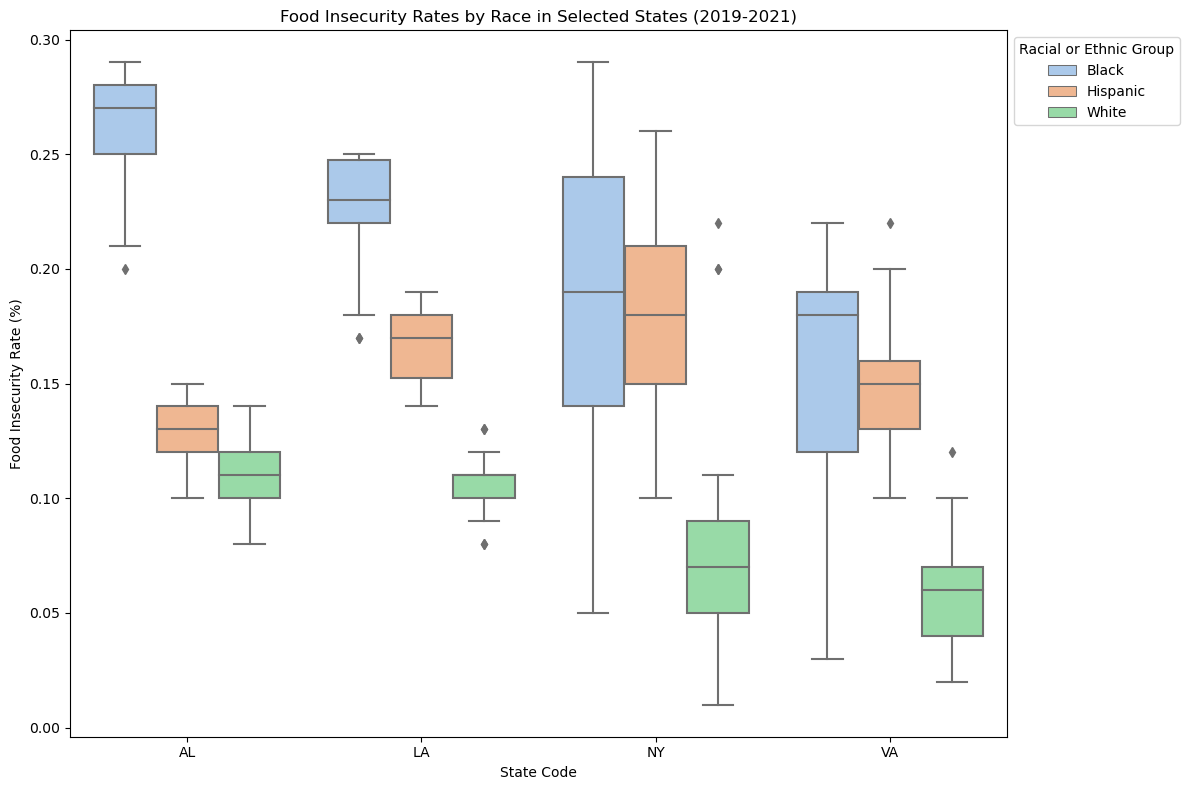

In [10]:
congressional_data = pd.read_csv('2019_2021_cong_DI_dat.csv')


target_states = ['LA',  'AL', 'NY', 'VA']
congressional_data_filtered = congressional_data[congressional_data['State'].isin(target_states)]


congressional_data_melted = congressional_data_filtered.melt(id_vars=['State', 'year'], 
                                                             value_vars=['FI_rate_black', 'FI_rate_hispanic', 'FI_rate_white'], 
                                                             var_name='Race_group', value_name='FI_rate_value')


plt.figure(figsize=(12, 8))
sns_boxplot = sns.boxplot(x='State', y='FI_rate_value', hue='Race_group', data=congressional_data_melted, palette='pastel')


plt.title('Food Insecurity Rates by Race in Selected States (2019-2021)')
plt.ylabel('Food Insecurity Rate (%)')
plt.xlabel('State Code')


leg = plt.legend(title='Racial or Ethnic Group', loc='upper left', bbox_to_anchor=(1, 1))
new_labels = ['Black', 'Hispanic', 'White']
for t, l in zip(leg.texts, new_labels):  
    t.set_text(l)

plt.tight_layout()  
plt.show()

In [11]:
states = congressional_data['State'].unique()


significant_states = []


for state in states:
   
    state_data = congressional_data[congressional_data['State'] == state]
    
    
    f_val, p_val = stats.f_oneway(state_data['FI_rate_black'], 
                                  state_data['FI_rate_hispanic'], 
                                  state_data['FI_rate_white'])
    
    
    if p_val < 0.05:
        
        stacked_data = state_data[['FI_rate_black', 'FI_rate_hispanic', 'FI_rate_white']].stack().reset_index()
        stacked_data.columns = ['index', 'Race', 'FI_rate']
        
        
        tukey = pairwise_tukeyhsd(endog=stacked_data['FI_rate'],
                                  groups=stacked_data['Race'],
                                  alpha=0.05)
        
        
        significant_states.append((state, tukey))


print("States with significant differences between groups:")
for state, tukey_result in significant_states:
    print(state)
    print(tukey_result)
    print("\n")  


states_with_significant_differences = [state for state, _ in significant_states]
print("List of states with significant differences between groups:")
print(states_with_significant_differences)

States with significant differences between groups:
AL
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
   FI_rate_black FI_rate_hispanic  -0.1343    0.0 -0.1491 -0.1195   True
   FI_rate_black    FI_rate_white  -0.1533    0.0 -0.1682 -0.1385   True
FI_rate_hispanic    FI_rate_white   -0.019 0.0085 -0.0339 -0.0042   True
------------------------------------------------------------------------


AK
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
   FI_rate_black FI_rate_hispanic    -0.05 0.0021 -0.0751 -0.0249   True
   FI_rate_black    FI_rate_white    -0.11    0.0 -0.1351 -0.0849   True
FI_rate_hispanic    FI_rate_white    -0.06 0.0008 -0.0851 -0.034